<a href="https://colab.research.google.com/github/HaniaArif/Shape_extractor/blob/main/shape_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !apt-get install libopencv-dev python-opencv

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following NEW packages will be installed:
  python-opencv
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 535 kB of archives.
After this operation, 2,944 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [535 kB]
Fetched 535 kB in 1s (489 kB/s)
Selecting previously unselected package python-opencv.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../python-opencv_3.2.0+dfsg-4ubuntu0.1_amd64.deb ...
Unpacking python-opencv (3.2.0+dfsg-4ubuntu0.1) ...
Setting up python-opencv (3.2.0+dfsg-4ubuntu0.1) ...


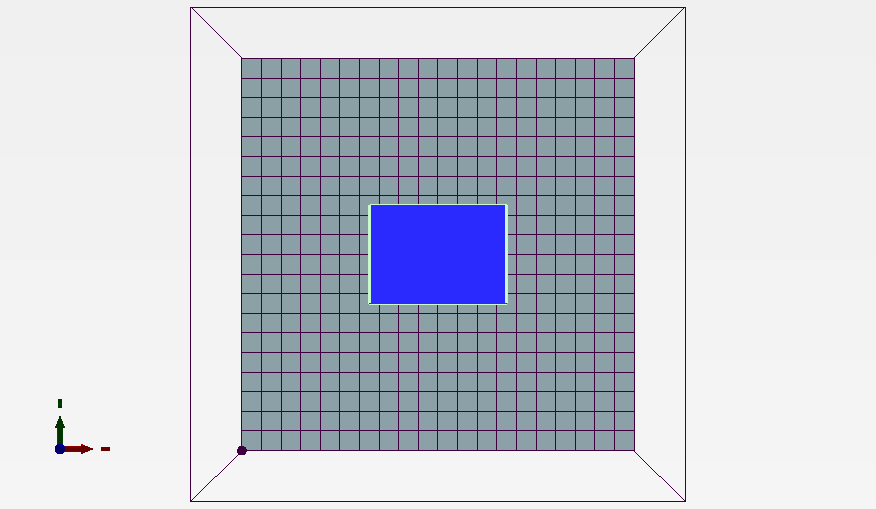

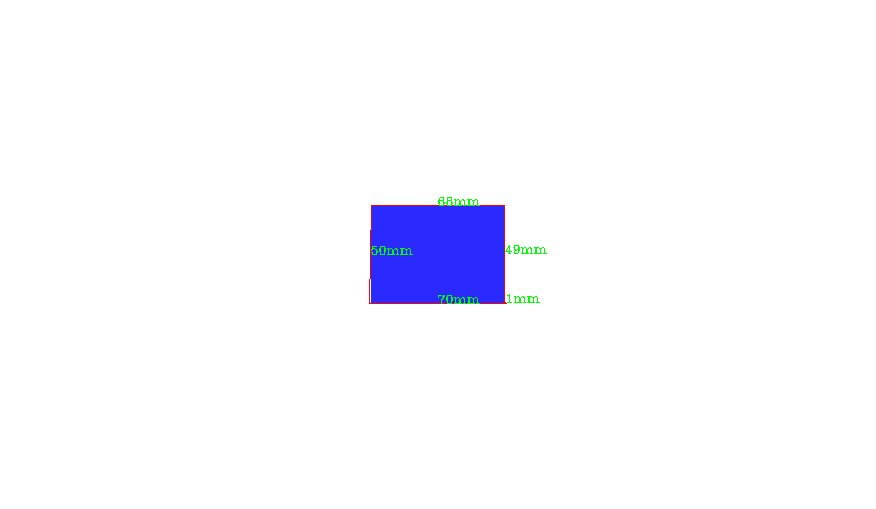

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

frame = cv2.imread("/content/drive/MyDrive/shapes/rect50.png")    #change your image path here

# convert image to hsv
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
size = frame.size

# set the upper and lower blue color range to delete other colors from image
lower_blue = np.array([110,190,190])
upper_blue = np.array([130,255,255])

# create a mast using detectable blue color range
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# apply mask to image
result = cv2.bitwise_and(frame,frame, mask= mask)

# convert black background of result to white for proper visualization
result[np.where((result==[0,0,0]).all(axis=2))] = [255,255,255]

# convert black background of result to white for proper visualization
result[np.where((result!=[255, 255, 255]).all(axis=2))] = [0, 0, 0]

def FillHole(mask):   #for removing the plus mark in the center of the image
  contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  len_contour = len (contours)
  contour_list = []
  for i in range(len_contour):
    drawing = np.zeros_like(mask, np.uint8)  # create a black image
    img_contour = cv2.drawContours(drawing, contours, i, (255, 255, 255), -1)
    contour_list.append(img_contour)
  out = sum(contour_list)
  out = cv2.bitwise_not(out)
  return out

result2 = cv2.bitwise_not(result)
gray = cv2.cvtColor(result2, cv2.COLOR_BGR2GRAY)
mask_out = FillHole(gray)
result2 = cv2.bitwise_not(mask_out)
result3 = cv2.cvtColor(result2, cv2.COLOR_GRAY2BGR)
# Detecting contours in image.
contours, _= cv2.findContours(result2, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1 )
# print(contours)
font = cv2.FONT_HERSHEY_COMPLEX
# Going through every contours found in the image.
for cnt in contours :
  approx = cv2.approxPolyDP(cnt, 0.0001 * cv2.arcLength(cnt, True), True)
  # print(approx)
  # draws boundary of contours.
  cv2.drawContours(result, [approx], 0, (0, 0, 255), 1) 
  # Used to flatted the array containing
  # the co-ordinates of the vertices.
  n = approx.ravel() 
  # print(n)
  i = 0
  p = 0
  temp = 200/393
  if(n.size > 50):    #if shape is a circle check it's radius and display
    area = cv2.contourArea(cnt)
    (cx, cy), radius = cv2.minEnclosingCircle(cnt)
    cv2.putText(result, "d = "+str(round(2* radius * temp))+"mm", (int(cx), int(cy)), font, 0.4, (0, 255, 0))
    break
  else:               #if shape is not a circle check for correct contour detection
    for k in range(2, n.size, 2):
      # print(k)
      # print("size = ", n.size/2)
      x1 = 0
      x2 = 0
      x3 = 0
      y1 = 0 
      y2 = 0 
      y3 = 0
      if(k < n.size-4):
        x2 = n[k]
        y2 = n[k+1]
        x1 = n[k-2]
        y1 = n[k-1]
        x3 = n[k+2]
        y3 = n[k+3]
        # print(x1, y1, x2, y2, x3, y3)
      else:
        x2 = n[k]
        y2 = n[k+1]
        x1 = n[k-2]
        y1 = n[k-1]
        x3 = n[0]
        y3 = n[1]
      if(abs(x1-x2) == 1 & abs(y2-y3) == 1):
        n[k] = x1     # x2 = x1
        n[k+1] = y3   # y2 = y3
  # print(n)
  i = 0    
  for j in n :  
    if(i % 2 == 0):
      # print(i)
      x = n[i]
      y = n[i + 1]
      # String containing the co-ordinates.
      string = str(x) + " " + str(y) 
      if(i == 0):
        # text on topmost co-ordinate.
        x2 = n[n.size-2]
        y2 = n[n.size-1] 
        # print(x, x2, y, y2)
        r = ((((x2 - x )**2) + ((y2-y)**2) )**0.5)
        r = round(r) * temp
        # print(r)
        mid_x = int((x+x2)//2)
        # print(mid_x)
        mid_y = int((y+y2)//2)
        # print(mid_y)
        cv2.putText(result, str(round(r))+"mm", (mid_x, mid_y), font, 0.4, (0, 255, 0)) 
      else:
        # text on remaining co-ordinates.
        # r = ((((x2 - x1 )**2) + ((y2-y1)**2) )**0.5)
        # print(r)
        x2 = n[i-2]
        y2 = n[i-1] 
        # print(x, x2, y, y2)
        r = ((((x2 - x )**2) + ((y2-y)**2) )**0.5)
        # print(r)
        r = round(r) * temp
        # print(r)
        mid_x = int((x+x2)//2)
        mid_y = int((y+y2)//2)
        cv2.putText(result, str(round(r))+"mm", (mid_x, mid_y), font, 0.4, (0, 255, 0))

    i = i + 1
  

# result2 = cv2.bitwise_not(mask_out)

# show original image
cv2_imshow(frame)

# show results
cv2_imshow(result)

#save results
cv2.imwrite("result.png", result)

In [ ]:
x1 = 434 #190
y1 = 8 #7
x2 = 434 #190
y2 = 400 #501
d = ((((x2 - x1 )**2) + ((y2 - y1)**2) )**0.5)
print(d)


392.0


In [ ]:
x1 = 133 #190
y1 = 150 #7
x2 = 133 #190
y2 = 240 #501
d = ((((x2 - x1 )**2) + ((y2 - y1)**2) )**0.5)
print(d)


90.0


In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
edges = cv2.Laplacian(gray,cv2.CV_8UC1)


mask_out = FillHole(edges)
# cv2_imshow(mask_out)


contours, _= cv2.findContours(mask_out, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1 )
for cnt in contours :
  approx = cv2.approxPolyDP(cnt, 0.0001 * cv2.arcLength(cnt, True), True)
  # print(approx)
  # draws boundary of contours.
  cv2.drawContours(frame, [approx], 0, (0, 0, 255), 1) 
  # Used to flatted the array containing
  # the co-ordinates of the vertices.
  n = approx.ravel() 
  i = 0
  p = 0
  for j in n :
    if(i % 2 == 0):
      x = n[i]
      y = n[i + 1]
  
      # String containing the co-ordinates.
      string = str(x) + " " + str(y) 
  
      if(i == 0):
        # text on topmost co-ordinate.
        cv2.putText(frame, string, (x, y),font, 0.5, (255, 0, 0)) 
      else:
        # text on remaining co-ordinates.
        cv2.putText(frame, string, (x, y), font, 0.5, (0, 255, 0)) 
    i = i + 1
cv2_imshow(frame)

Select the type of shape for which you want to measure dimensions:
[1]Circle 	[2]Square/Rectangle 	[3]Triangle 	[4]Flange
Select Your Shape Option:3


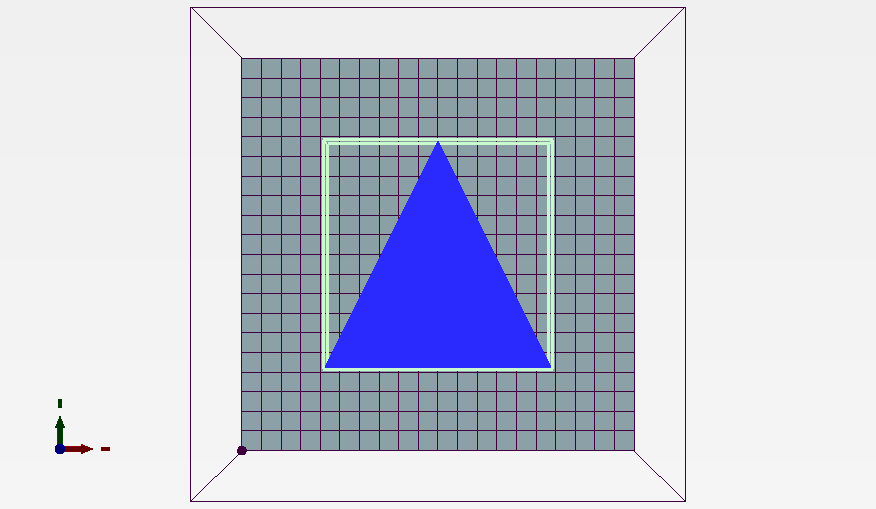

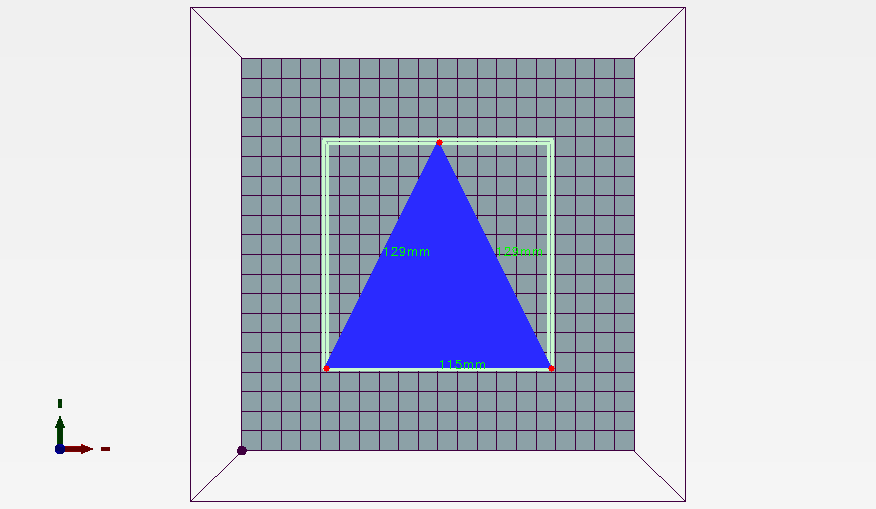

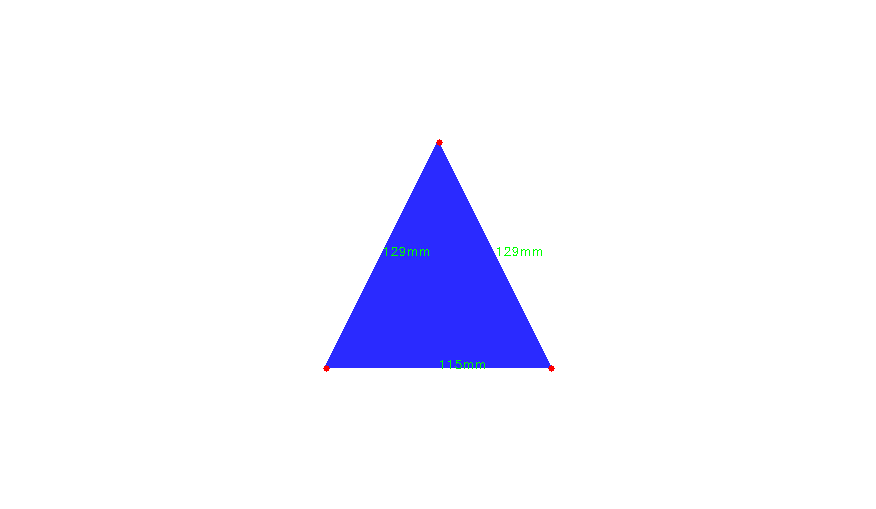

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

frame = cv2.imread("/content/drive/MyDrive/shapes/triangle.png")    #change your image path here
print("Select the type of shape for which you want to measure dimensions:")
print("[1]Circle \t[2]Square/Rectangle \t[3]Triangle \t[4]Flange")
shape = int(input("Select Your Shape Option:"))
original_img = frame.copy()
white_img = frame.copy()

# convert image to hsv
hsv = cv2.cvtColor(white_img, cv2.COLOR_BGR2HSV)
size = frame.size

# set the upper and lower blue color range to delete other colors from image
lower_blue = np.array([110,190,190])
upper_blue = np.array([130,255,255])

# create a mast using detectable blue color range
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# apply mask to image
white_img = cv2.bitwise_and(white_img,white_img, mask= mask)

# convert black background of result to white for proper visualization
white_img[np.where((white_img==[0,0,0]).all(axis=2))] = [255,255,255]

# convert black background of result to white for proper visualization
white_img[np.where((white_img!=[255, 255, 255]).all(axis=2))] = [0, 0, 0]

# process original image
frame2 = frame[62:447, 245:631]
gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

kernel = np.ones((2, 2), np.uint8)
img_dilation = cv2.dilate(gray, kernel, iterations=1)
# cv2_imshow(img_dilation)

kernel = np.ones((2, 2), np.uint8)
img_dilation = cv2.erode(img_dilation, kernel, iterations=1)
# cv2_imshow(img_dilation)
temp_tri = img_dilation[:]

ret, thresh1 = cv2.threshold(img_dilation, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_dilation, 200, 255, cv2.THRESH_BINARY)
thresh2 = cv2.bitwise_not(thresh2)
edges = cv2.Laplacian(thresh1,cv2.CV_8UC1)
# cv2_imshow(thresh1)
# cv2_imshow(thresh2)
temp = cv2.bitwise_and(thresh1,thresh2)
temp = cv2.bitwise_not(temp)
# cv2_imshow(temp)
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(temp, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
# cv2_imshow(closing)

if(shape == 1):
  kernel = np.ones((7, 7), np.uint8)
  closing = cv2.erode(closing, kernel, iterations=1)

if(shape == 3):
  closing = temp_tri
  # kernel = np.ones((5, 5), np.uint8)
  # closing = cv2.erode(temp_tri, kernel, iterations=1)
  # cv2_imshow(closing)

# kernel = np.ones((5, 5), np.uint8)
# img_dilation = cv2.dilate(edges, kernel, iterations=1)

def FillHole(mask):
  contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  len_contour = len (contours)
  contour_list = []
  for i in range(len_contour):
    drawing = np.zeros_like(mask, np.uint8)  # create a black image
    img_contour = cv2.drawContours(drawing, contours, i, (255, 255, 255), -1)
    contour_list.append(img_contour)
  out = sum(contour_list)
  return out

# out = FillHole(img_dilation)
edges = cv2.Laplacian(closing,cv2.CV_8UC1)
# cv2_imshow(edges)
contours, _= cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1 )
font = cv2.FONT_HERSHEY_SIMPLEX
temp = 200/392
points = 0
if(shape == 1): # circle
  for cnt in contours:
    (cx, cy), radius = cv2.minEnclosingCircle(cnt)
    cv2.circle(frame, (int(cx)+245, int(cy)+60), 3, (0, 0, 255), -1)
    cv2.circle(frame, (int(cx)+245, int(cy)+60), int(radius), (0, 0, 255), -1)
    cv2.putText(frame, "d = "+str(round(2* radius * temp))+"mm", (int(cx)+245, int(cy)+60), font, 0.4, (0, 255, 0))
    cv2.circle(white_img, (int(cx)+245, int(cy)+60), 3, (0, 0, 255), -1)
    cv2.putText(white_img, "d = "+str(round(2* radius * temp))+"mm", (int(cx)+245, int(cy)+60), font, 0.4, (0, 255, 0))
    break
elif(shape == 2): # square / rectangle
  points = 4
elif(shape == 3): # triangle
  points = 3
elif(shape == 4): # flange
  points = 8
if(shape > 1):

  corners = cv2.goodFeaturesToTrack(edges, points, 0.01, 10)
  corners = np.int0(corners)
  img_dilation = cv2.cvtColor(img_dilation, cv2.COLOR_GRAY2BGR)
  for i in corners:
    # print(i.ravel())
    x, y = i.ravel()
    string = str(x) + " " + str(y)
    cv2.circle(frame, (x+245, y+62), 3, (0, 0, 255), -1)
    cv2.circle(white_img, (x+245, y+62), 3, (0, 0, 255), -1)
  i = 0
  n = []
  if(shape != 3):
    flags = dict()
    for i in corners:
      min = 10
      min_index = 0
      x = 0
      k = 0
      for cnt in contours:
        if(x==1):
          for j in cnt:
            d=0
            x1, y1 = i.ravel()
            x2, y2 = j.ravel()
            d = ((((x2 - x1 )**2) + ((y2 - y1)**2) )**0.5)
            if(d < min):
              min = d
              min_index = k
            k = k+1
        x = x+1
      a, b = i.ravel()
      flags[min_index] = [a, b]
    for i in sorted (flags) :
      x, y = flags[i]
      n.append(flags[i])
    # print(flags)
  else:
    for i in corners:
      a, b = i.ravel()
      n.append([a, b])
  for i in range(0, len(n)):
    x, y = n[i] 
    x2 = 0
    y2 = 0 
    if(i == len(n)-1):
      x2, y2 = n[0]
    else:
      x2, y2 = n[i+1]
    d = ((((x2 - x )**2) + ((y2-y)**2) )**0.5) * temp
    mid_x = int((x+x2)//2)
    mid_y = int((y+y2)//2)
    cv2.putText(frame, str(round(d))+"mm", (mid_x+245, mid_y+62), font, 0.4, (0, 255, 0)) 
    cv2.putText(white_img, str(round(d))+"mm", (mid_x+245, mid_y+62), font, 0.4, (0, 255, 0)) 
    
cv2_imshow(original_img)
cv2_imshow(frame)
cv2_imshow(white_img)

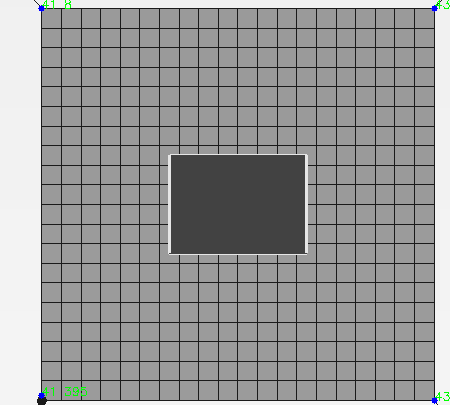

[[[434 400]]

 [[ 41 395]]

 [[434   8]]

 [[ 41   8]]]


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

frame = cv2.imread("/content/drive/MyDrive/shapes/rect50.png")    #change your image path here
frame = frame[50:455, 200:650]
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 4, 0.01, 10)
corners = np.int0(corners)
  
# we iterate through each corner, 
# making a circle at each point that we think is a corner.
img_dilation = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
for i in corners:
  x, y = i.ravel()
  string = str(x) + " " + str(y)
  cv2.circle(img_dilation, (x, y), 3, 255, -1)
  cv2.putText(img_dilation, string, (x, y), font, 0.4, (0, 255, 0)) 
cv2_imshow(img_dilation)
print(corners)

In [ ]:
x = 1